In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras

# Load CIFAR-10 Dataset


In [2]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/6)


print("Training:", x_train.shape,y_train.shape)
print("Validation:", x_val.shape,y_val.shape)
print("Test:", x_test.shape,y_test.shape)

170498071/170498071 [==============================] - 14s 0us/step
Training: (41666, 32, 32, 3) (41666, 1)
Validation: (8334, 32, 32, 3) (8334, 1)
Test: (10000, 32, 32, 3) (10000, 1)


# Show sample CIFAR-10 Images

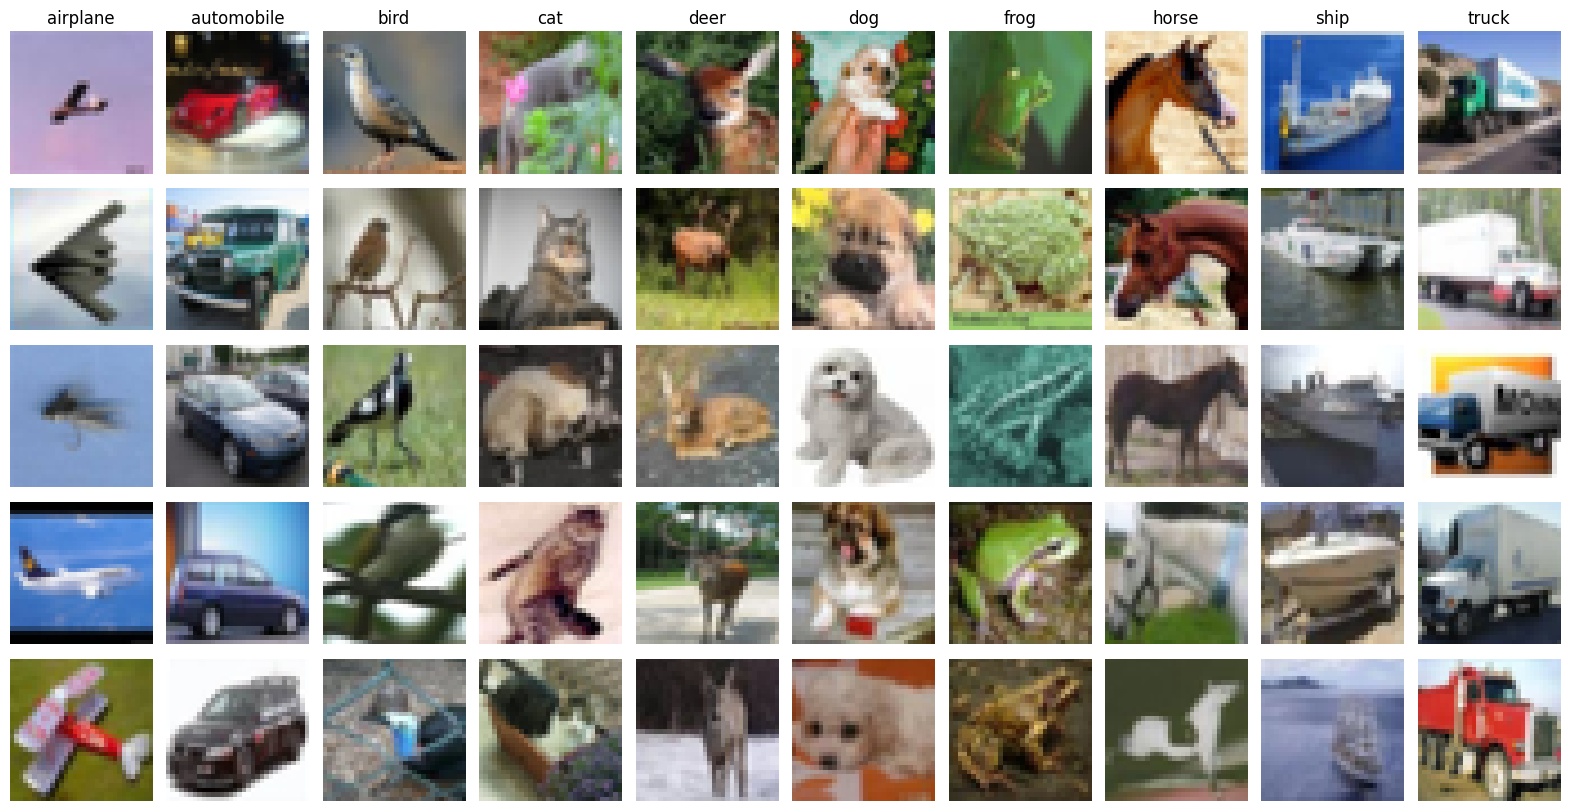

In [3]:
# Define CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Initialize a figure
fig, axarr = plt.subplots(5, 10, figsize=(20, 10))

# Iterate through each class
for class_index in range(10):
    # Find the indices of images with the current class
    class_indices = np.where(y_train == class_index)[0]
    # Randomly select 5 samples
    random_indices = np.random.choice(class_indices, size=5, replace=False)
    # Plot each sample in a column
    for i, idx in enumerate(random_indices):
        axarr[i, class_index].imshow(x_train[idx])
        if i==0: axarr[i, class_index].set_title(class_names[class_index])
        axarr[i, class_index].axis('off')

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Load Different Layers and Create the Model (Original Code)

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Rescaling, Dense
from keras.layers import Conv2D, MaxPooling2D

# Create a Sequential model
model = Sequential()

# Add a layer to normlize the data
model.add(Rescaling(scale=1.0/255, offset=0.0))


# Add Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output of Convolutional layers
model.add(Flatten())

# Add Dense layers
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Output layer with 10 units for 10 classes


## Compiling the Model

In [5]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy # equivalent to "categorical_crossentropy" without requiring one-hot encoded labels
# from keras.metrics import CategroicalAccuracy

model.compile(optimizer=Adam(learning_rate=0.001),loss=sparse_categorical_crossentropy,metrics=["accuracy"])


## Train the Original Model

In [6]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50,
                    validation_data=(x_val,y_val))

Epoch 1/50
326/326 [==============================] - 15s 22ms/step - loss: 1.4848 - accuracy: 0.4656 - val_loss: 1.1842 - val_accuracy: 0.5811
Epoch 2/50
326/326 [==============================] - 5s 14ms/step - loss: 1.0435 - accuracy: 0.6351 - val_loss: 1.0352 - val_accuracy: 0.6440
Epoch 3/50
326/326 [==============================] - 6s 19ms/step - loss: 0.8577 - accuracy: 0.7007 - val_loss: 0.8687 - val_accuracy: 0.7041
Epoch 4/50
326/326 [==============================] - 4s 12ms/step - loss: 0.7347 - accuracy: 0.7436 - val_loss: 0.8000 - val_accuracy: 0.7263
Epoch 5/50
326/326 [==============================] - 4s 12ms/step - loss: 0.6254 - accuracy: 0.7818 - val_loss: 0.7982 - val_accuracy: 0.7322
Epoch 6/50
326/326 [==============================] - 4s 12ms/step - loss: 0.5326 - accuracy: 0.8134 - val_loss: 0.7755 - val_accuracy: 0.7402
Epoch 7/50
326/326 [==============================] - 4s 13ms/step - loss: 0.4261 - accuracy: 0.8545 - val_loss: 0.8080 - val_accuracy: 0.732

## Plot Learning Curve

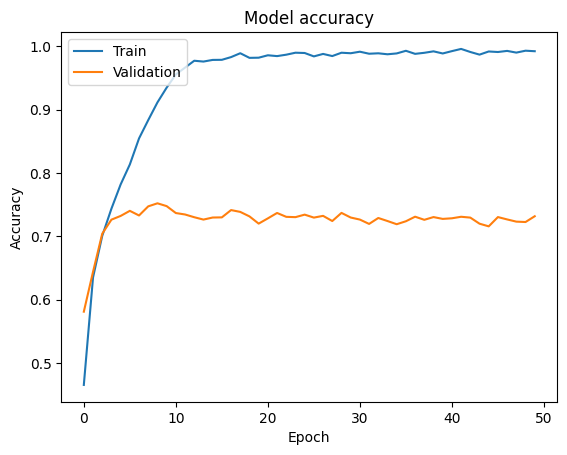

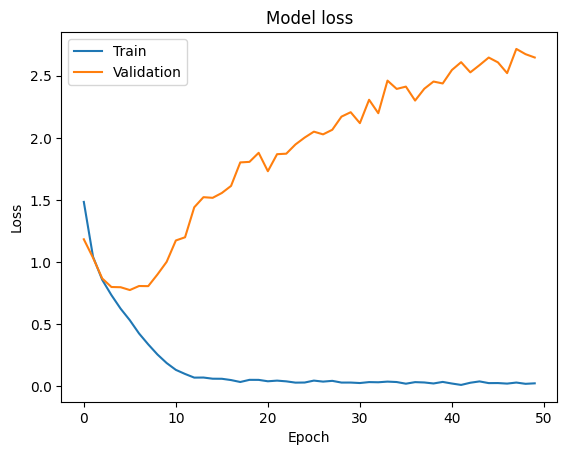

In [7]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


## Evaluating the model (Original)

In [8]:
# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 2.6872 - accuracy: 0.7275
Test Loss: 2.687225103378296
Test Accuracy: 0.7275000214576721


## further evaluation

In [9]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred=model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test,y_pred=y_pred))
print(confusion_matrix(y_true=y_test,y_pred=y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.74      0.75      0.75      1000
           1       0.88      0.82      0.85      1000
           2       0.62      0.61      0.61      1000
           3       0.53      0.50      0.52      1000
           4       0.68      0.72      0.70      1000
           5       0.64      0.61      0.62      1000
           6       0.70      0.87      0.77      1000
           7       0.80      0.74      0.77      1000
           8       0.87      0.82      0.85      1000
           9       0.81      0.83      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000

[[752  18  71  26  15   5  21  11  51  30]
 [ 22 821  10  14   7   2  19   3  23  79]
 [ 79   8 607  50  78  48  85  30   9   6]
 [ 26   5  76 503  65 165  99  40   8  13]
 [ 21   2  58 

# Sadegh-Kalami Codes

## Install Tuner

In [10]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.1 MB/s eta 0:00:00


## First Model (Only Dropout added)

In [ ]:
import keras_tuner as kt
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

# # Load CIFAR-10 data
# (x_train, y_train), (x_test, y_test) = cifar10.load_data()
# x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=1/6, random_state=20)

def build_model(hp):
    model = Sequential([
        Rescaling(scale=1.0/255, input_shape=(32, 32, 3)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.9, step=0.1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.9, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.9, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.9, step=0.1)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Create a tuner. You can choose from RandomSearch, Hyperband, BayesianOptimization, and Sklearn
tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=4,
                     directory='my_dir',
                     project_name='intro_to_kt')

# Create a callback to stop training early after reaching a certain value for the validation loss
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal dropout rates are:
    - Dropout 1: {best_hps.get('dropout_1')}
    - Dropout 2: {best_hps.get('dropout_2')}
    - Dropout 3: {best_hps.get('dropout_3')}
    - Dropout 4: {best_hps.get('dropout_4')}
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val))

model.save('Sadegh-Kalami-Dropout-added.keras')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plotting training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model on test data
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

## Second Model (StopEarly and LR-Schedular)

In [12]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

def build_model(hp):
    model = Sequential([
        Rescaling(scale=1.0/255, input_shape=(32, 32, 3)),
        Conv2D(32, kernel_size=(3, 3), activation='relu'),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.9, step=0.1)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.9, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.9, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.9, step=0.1)),
        Dense(10, activation='softmax')
    ])

    # Hyperparameter for learning rate
    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=4,
                     directory='my_dir',
                     project_name='intro_to_kt')

# EarlyStopping Callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[stop_early, lr_scheduler])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal parameters are:
    - Dropout 1: {best_hps.get('dropout_1')}
    - Dropout 2: {best_hps.get('dropout_2')}
    - Dropout 3: {best_hps.get('dropout_3')}
    - Dropout 4: {best_hps.get('dropout_4')}
    - Learning Rate: {best_hps.get('learning_rate')}
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),callbacks=[stop_early, lr_scheduler])

model.save('Sadegh-Kalami-EarlyStoping-LR.keras')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
0.5               |0.5               |dropout_1
0.2               |0.2               |dropout_2
0.6               |0.6               |dropout_3
0.9               |0.9               |dropout_4
0.00064851        |0.00064851        |learning_rate
4                 |4                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/4
1303/1303 [==============================] - 13s 8ms/step - loss: 1.9907 - accuracy: 0.2473 - val_loss: 1.8431 - val_accuracy: 0.3877 - lr: 6.4851e-04
Epoch 2/4
1303/1303 [==============================] - 11s 8ms/step - loss: 1.7190 - accuracy: 0.3536 - val_loss: 1.6845 - val_accuracy: 0.4518 - lr: 6.4851e-04
Epoch 3/4
1303/1303 [==============================] - 10s 8ms/step - loss: 1.5967 - accuracy: 0.4068 - val_loss: 1.5510 - val_accuracy: 0.493

KeyboardInterrupt: 

## Third Model (Batchnorm + EarlyStop + LR-Schedular)

In [13]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import BatchNormalization

def build_model(hp):
    model = Sequential([
        Rescaling(scale=1.0/255, input_shape=(32, 32, 3)),
        Conv2D(32, kernel_size=(3, 3), use_bias=False),  # Remove bias because BatchNormalization has its own bias
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),  # Apply activation after BatchNormalization
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.9, step=0.1)),

        Conv2D(64, kernel_size=(3, 3), use_bias=False),
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.9, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(128, kernel_size=(3, 3), use_bias=False),
        BatchNormalization(),
        tf.keras.layers.Activation('relu'),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.9, step=0.1)),
        MaxPooling2D(pool_size=(2, 2)),

        Flatten(),
        Dense(256, activation='relu'),
        Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.9, step=0.1)),
        Dense(10, activation='softmax')
    ])

    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model




tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=4,
                     directory='my_dir',
                     project_name='intro_to_kt')

# EarlyStopping Callback
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

tuner.search(x_train, y_train, epochs=50, validation_data=(x_val, y_val), callbacks=[stop_early, lr_scheduler])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal parameters are:
    - Dropout 1: {best_hps.get('dropout_1')}
    - Dropout 2: {best_hps.get('dropout_2')}
    - Dropout 3: {best_hps.get('dropout_3')}
    - Dropout 4: {best_hps.get('dropout_4')}
    - Learning Rate: {best_hps.get('learning_rate')}
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),callbacks=[stop_early, lr_scheduler])

model.save('Sadegh-Kalami-batchnormed.keras')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Trial 1 Complete [00h 01m 24s]
val_accuracy: 0.43088552355766296

Best val_accuracy So Far: 0.43088552355766296
Total elapsed time: 00h 01m 24s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
0.9               |0.3               |dropout_1
0.3               |0.6               |dropout_2
0.5               |0.1               |dropout_3
0.6               |0.1               |dropout_4
0.0004766         |0.00027458        |learning_rate
4                 |4                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/4
1303/1303 [==============================] - 14s 9ms/step - loss: 2.2215 - accuracy: 0.1410 - val_loss: 2.2614 - val_accuracy: 0.0991 - lr: 4.7660e-04
Epoch 2/4
 758/1303 [================>.............] - ETA: 4s - loss: 2.1105 - accuracy: 0.1552

KeyboardInterrupt: 

## Final Model (all above + L2-Regularization)

In [14]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Rescaling, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras_tuner as kt
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization




################### side option ##############
# # Data Augmentation
# datagen = ImageDataGenerator(
#     rotation_range=15,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
#     zoom_range=0.2
# )

def build_model(hp):
    l2_reg = hp.Float('l2_reg', min_value=1e-5, max_value=1e-2, sampling='log')

    model = Sequential([
        Rescaling(scale=1.0/255, input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), use_bias=False, kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(hp.Float('dropout_1', min_value=0.1, max_value=0.5, step=0.1)),

        Conv2D(64, (3, 3), use_bias=False, kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(hp.Float('dropout_2', min_value=0.1, max_value=0.5, step=0.1)),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), use_bias=False, kernel_regularizer=l2(l2_reg)),
        BatchNormalization(),
        Activation('relu'),
        Dropout(hp.Float('dropout_3', min_value=0.1, max_value=0.5, step=0.1)),
        MaxPooling2D((2, 2)),

        Flatten(),
        Dense(256, activation='relu', kernel_regularizer=l2(l2_reg)),
        Dropout(hp.Float('dropout_4', min_value=0.1, max_value=0.5, step=0.1)),
        Dense(10, activation='softmax')
    ])

    lr = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss=SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model










tuner = kt.Hyperband(build_model,
                     objective='val_accuracy',
                     max_epochs=70,
                     factor=4,
                     directory='my_dir',
                     project_name='intro_to_kt')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

def scheduler(epoch, lr):
    if epoch < 10:
        return float(lr)
    else:
        return float(lr * tf.math.exp(-0.1).numpy())


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

tuner.search(x_train, y_train, epochs=70, validation_data=(x_val, y_val), callbacks=[stop_early, lr_scheduler])

best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
The hyperparameter search is complete. The optimal parameters are:
    - Dropout 1: {best_hps.get('dropout_1')}
    - Dropout 2: {best_hps.get('dropout_2')}
    - Dropout 3: {best_hps.get('dropout_3')}
    - Dropout 4: {best_hps.get('dropout_4')}
    - Learning Rate: {best_hps.get('learning_rate')}
    - Learning Rate: {best_hps.get('l2_reg')}
""")

model = tuner.hypermodel.build(best_hps)
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val),callbacks=[stop_early, lr_scheduler])

model.save('Sadegh-Kalami_l2r-added.keras')

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_true=y_test, y_pred=y_pred))
print(confusion_matrix(y_true=y_test, y_pred=y_pred))

Reloading Tuner from my_dir/intro_to_kt/tuner0.json

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
0.9               |0.3               |dropout_1
0.3               |0.6               |dropout_2
0.5               |0.1               |dropout_3
0.6               |0.1               |dropout_4
0.0004766         |0.00027458        |learning_rate
4                 |4                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
2                 |2                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/4
 706/1303 [===============>..............] - ETA: 5s - loss: 2.2927 - accuracy: 0.1324

KeyboardInterrupt: 